In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.backend import backend as k
from tensorflow.keras.callbacks import History
import cv2
import itertools
import os
import numpy as np
import pandas as pd
import shutil
import random
import glob
import imageio
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [12]:
os.chdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images')

In [13]:
os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images')

['Parasitized', 'Uninfected']

In [14]:
if os.path.isdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/train/Parasitized') is False:
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/train/Parasitized')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/train/Uninfected')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/valid/Parasitized')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/valid/Uninfected')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/test/Parasitized')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/test/Uninfected')

In [15]:
Parasitized_files=os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized')
Uninfected_files=os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected')
print('Number of images of type parasitized:',len(Parasitized_files))
print('Number of images of type Uninfected:',len(Uninfected_files))


Number of images of type parasitized: 13780
Number of images of type Uninfected: 13780


In [16]:
# creating datasets for the train, validation and test 
# parasitized files 
Parasitized_files_train_images= random.sample(Parasitized_files,8000)
Parasitized_files_valid_images= random.sample(list(set(Parasitized_files)-set(Parasitized_files_train_images)),3000)
Parasitized_files_test_images=list(set(Parasitized_files)-set(Parasitized_files_valid_images)-set(Parasitized_files_train_images))

for file in (Parasitized_files_train_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Parasitized/'+file, resized_image)
print('Train folder has been created for Parasitized images ')
    
for file in (Parasitized_files_valid_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Parasitized/'+file, resized_image)
print('Validation folder has been created for Parasitized images ')

for file in (Parasitized_files_test_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Parasitized/'+file, resized_image)
print('Test folder has been created for Parasitized images ')

Train folder has been created for Parasitized images 
Validation folder has been created for Parasitized images 
Test folder has been created for Parasitized images 


In [17]:
# creating datasets for the train, validation and test 
# parasitized files 
Uninfected_files_train_images= random.sample(Uninfected_files,8000)
Uninfected_files_valid_images= random.sample(list(set(Uninfected_files)-set(Uninfected_files_train_images)),3000)
Uninfected_files_test_images=list(set(Uninfected_files)-set(Uninfected_files_valid_images)-set(Uninfected_files_train_images))

for file in (Uninfected_files_train_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Uninfected/'+file, resized_image)
print('Train folder has been created for Uninfected  images ')
    
for file in (Uninfected_files_valid_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Uninfected/'+file, resized_image)
print('Validation folder has been created for Uninfected valid images ')

for file in (Uninfected_files_test_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Uninfected/'+file, resized_image)
print('Test folder has been created for Uninfected  images ')

Train folder has been created for Uninfected  images 
Validation folder has been created for Uninfected valid images 
Test folder has been created for Uninfected  images 


In [24]:
train_file_names=[r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Parasitized/'+fname for fname in os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Parasitized/')]+\
                                             [r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Uninfected/'+fname for fname in os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Uninfected/')]

X_train=[cv2.imread(image) for image in train_file_names]
X_train=np.array(X_train)
y_train=['Parasitized']*8000 +['Uninfected']*7999


val_file_names=[r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Parasitized/'+fname for fname in os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Parasitized/')]+\
                                             [r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Uninfected/'+fname for fname in os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Uninfected/')]
X_valid=[cv2.imread(image) for image in val_file_names]
X_valid=np.array(X_valid)
y_valid=['Parasitized']*3000 +['Uninfected']*3000


test_file_names=[r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Parasitized/'+fname for fname in os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Parasitized/')]+\
                                             [r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Uninfected/'+fname for fname in os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Uninfected/')]
X_test=[cv2.imread(image) for image in test_file_names]
X_test=np.array(X_test)
y_test=['Parasitized']*2779 +['Uninfected']*2780

X_train=X_train.astype('float32')
X_valid=X_valid.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255
X_valid=X_valid/255
X_test=X_test/255

print('Shape of train dataset:', X_train.shape)
print('Shape of valid dataset:', X_valid.shape)
print('Shape of test dataset:', X_test.shape)

Shape of train dataset: (15999, 128, 128, 3)
Shape of valid dataset: (6000, 128, 128, 3)
Shape of test dataset: (5559, 128, 128, 3)


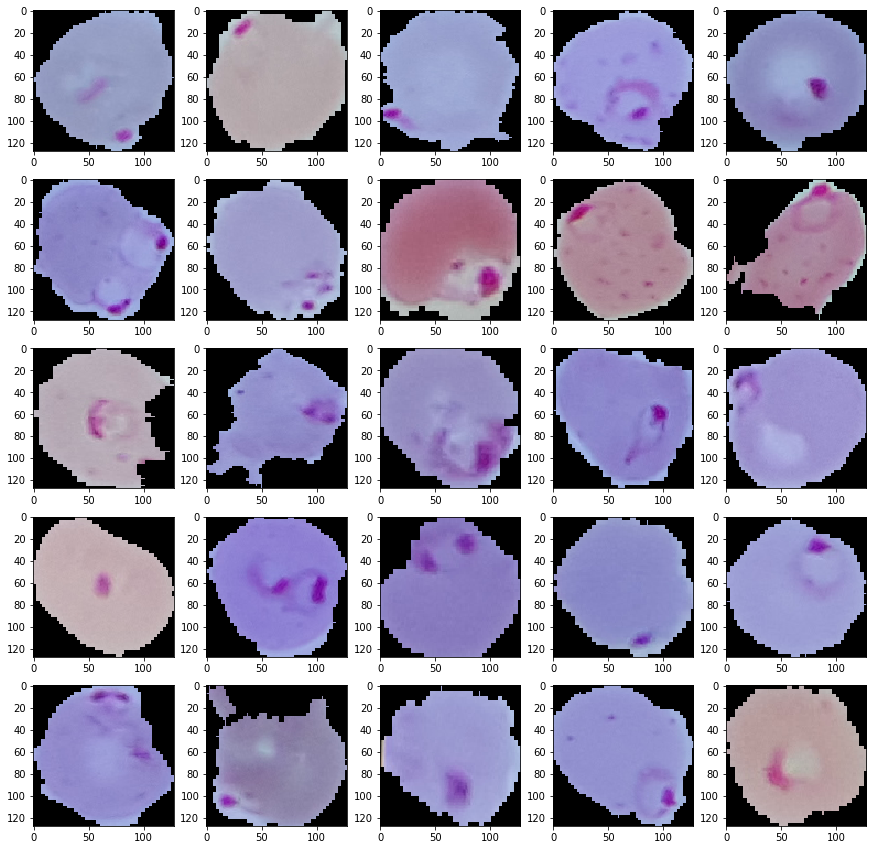

In [33]:
Parasitized_images=r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Parasitized'
Parasitized_sample_images=random.sample(os.listdir(Parasitized_images),26)

plt.figure(figsize=(15,15))
for i in range(1,len(Parasitized_sample_images)):
    row=i
    image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Parasitized/'+Parasitized_sample_images[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

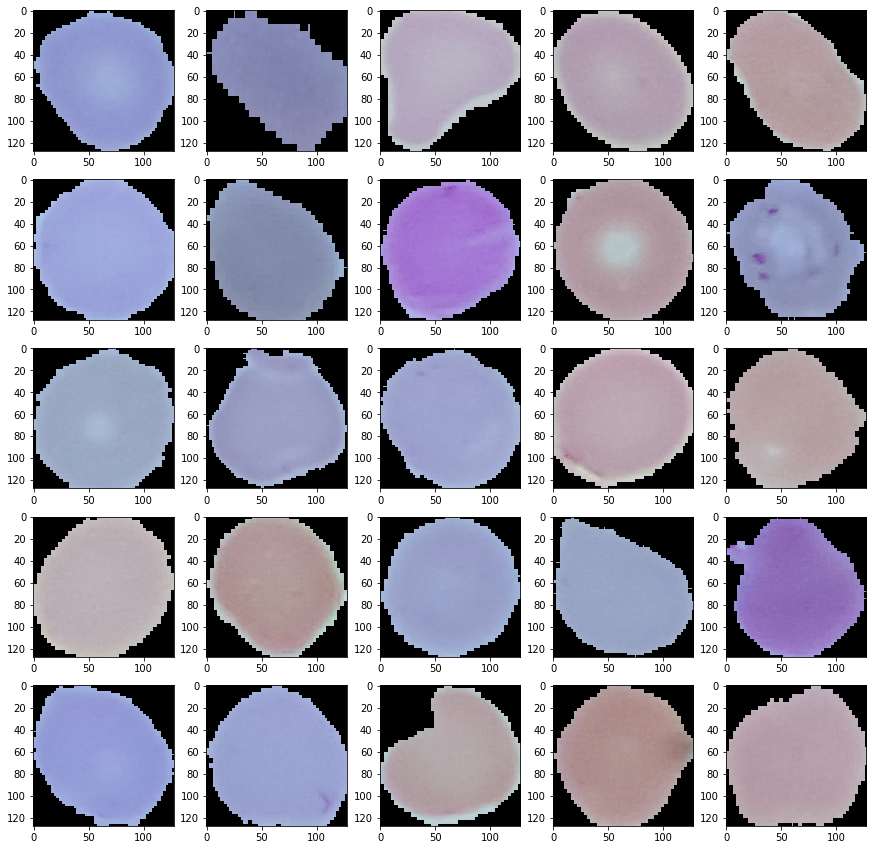

In [34]:
Uninfected_images=r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Uninfected'
Uninfected_sample_images=random.sample(os.listdir(Uninfected_images),26)

plt.figure(figsize=(15,15))
for i in range(1,len(Uninfected_sample_images)):
    row=i
    image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Uninfected/'+Uninfected_sample_images[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

In [35]:
def plt_train_val_acc(x,val_acc,train_acc,colors=['b']):
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(x,val_acc,'b',label="Validation Accuracy")
    plt.plot(x,train_acc,'r',label="Train Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy after each epoch')
    plt.legend()
    
def plt_train_val_loss(x,val_loss,train_loss,colors=['b']):
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(x,val_loss,'b',label="Validation Loss")
    plt.plot(x,train_loss,'r',label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel('Categorical Crossentropy loss')
    plt.legend()

In [36]:
def plot_confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)#Binary Confusion Matrix
    A=(((C.T)/(C.sum(axis=1))).T)#Recall Matrix
    B=(C/C.sum(axis=0))#Precision Matrix
    
    plt.figure(figsize=(20,4))
    labels=[0,1]
    
    cmap=sns.light_palette('blue')
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Confusion matrix [0:Uninfected, 1:Parasitized]')
    
    plt.subplot(1,3,2)
    sns.heatmap(B,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Precision matrix [0:Uninfected, 1:Parasitized]')
    
    plt.subplot(1,3,3)
    sns.heatmap(A,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Recall matrix [0:Uninfected, 1:Parasitized]')
    
    plt.show()

In [49]:
img_width, img_height=128,128

train_data_dir=r' C:\Users\vamsi\Desktop\Tensor flow\cell_images\train'
validation_data_dir=r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid'
nb_train_samples=15999
nb_validation_samples=6000
epochs=300
batch_size=20

if tf.keras.backend.image_data_format()=='channels_first':
    intput_shape=(3,img_width, img_height)
else:
    intput_shape=(img_width, img_height,3)

In [64]:
encoder=LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_valid)
encoder.fit(y_test)
y_train_enc=encoder.transform(y_train)
y_valid_enc=encoder.transform(y_valid)
y_test_enc=encoder.transform(y_test)


In [55]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                shear_range=0.2,
                                rotation_range=20,
                                width_shift_range=0.2)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train',
                                                  target_size=(128,128),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

validation_generator=val_datagen.flow_from_directory(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid',
                                                  target_size=(128,128),
                                                   batch_size=batch_size,
                                                   class_mode='binary')



Found 15999 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [56]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3),kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Flatten(),
    Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    Dropout(rate=0.5),
    BatchNormalization(),
    Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    Dropout(rate=0.5),
    Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')
    
])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 128)       5

In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
hist=History()
filepath=r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\model/malaria_cnn_model-{epoch:02d}-{val_acc:.2f}.hdf5'
save=ModelCheckpoint(filepath,monitor='val_loss',verbose=0,save_best_only=True,save_weights_only=False, mode='auto')


In [ ]:
model.fit_generator(x=train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_data=valid_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[hist,save],
    epochs=300,
    verbose=2
)


In [60]:
if os.path.isfile(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\model/malaria_cnn_model.h5') is False:
    model.save(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\model/malaria_cnn_model.h5')

In [ ]:
history=model.history

x=list(range(1,epochs+1))
val_loss=history.history['val_loss']
train_loss=history.history['loss']
plt_train_val_loss(x,val_loss,train_loss)

val_loss=history.history['val_acc']
train_loss=history.history['acc']
plt_train_val_acc(x,val_acc,train_acc)


In [36]:
# Model predection
model=load_model(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\model/malaria_cnn_model.h5')

y_pred=model.predict_classes(X_test,verbose=0)

# plotting Confusion matrix, Precision and Recall

plot_confusion_matrix(y_test_enc,y_pred) # confusion matrix

print('classification report on test(unseen) data\n')  # Precision
print(classification_report(y_test_enc,y_pred))

print('Test accuracy on unseen data: \n') # Recall
accuracy_score(y_test_enc, y_pred)

In [ ]:
def process_image(img_dir):
    test_image=cv2.imread(img_dir)
    test_image=cv2.resize(test_image,(128,128),interpolation=cv2.INTER_AREA)
    test_image=np.array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image, axis=0)
    return test_image

In [ ]:
def predict_image(img_dir):
    test_image=process_image(img_dir)
    y_proba_class0=model.predict_proba(test_image).flatten().tolist()[0]*100
    y_proba_class1 =100.0-y_proba_class0
    
    print('probability of the input image to be Parasitized: {:.6f}%'.format(y_proba_class1))
    print('probability of the input image to be Uninfected: {:.6f}%'.format(y_proba_class0))
    
    print()
    if (y_proba_class1> y_proba_class0):
        print('The cell image is infected with Malaria')
    else:
        print('The cell image is not infected with Malaria')
    

In [ ]:
model=load_model(MODEL_DIR+'malaria_cnn_model_augmented_7th_300epoch.h5')
print('Trained model loaded successfully...\n')
img_dir='test_image/'+'image.png'
MODEL_DIR='models/'

st=dt.now()
predict_image(img_dir)
end=dt.now()-st

print('\n Time taken to analyse the image and predict the result:',end)